# Show Output from 50 Epoch Results

In [8]:
# Load the libraries
import os
import sys
import random
import matplotlib
import matplotlib.pyplot as plt
import glob
import skimage

# Import Mask RCNN from Matterport
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn import model
import mrcnn.model as modellib
from mrcnn.model import log
import custom

import tensorflow as tf

%matplotlib inline

In [9]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Root directory of the project
ROOT_DIR = os.getcwd()
sys.path.append(ROOT_DIR)  # To find local version of the library
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
config = custom.CustomConfig()
custom_DIR = os.path.join(ROOT_DIR, "custom/")
custom_WEIGHTS_PATH = os.path.join(MODEL_DIR, "damage20200407T1358/mask_rcnn_damage_0050.h5")

# Run Model For Inference

### Setup Environment

In [11]:
config = custom.CustomConfig()
CUSTOM_DIR = os.path.join(ROOT_DIR + "/custom/")
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
DEVICE = "/gpu:1"
TEST_MODE = "inference"

### Show Example Preidcted Images for Unseen Data

Re-starting from epoch 50
Processing 1 images
image                    shape: (183, 276, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


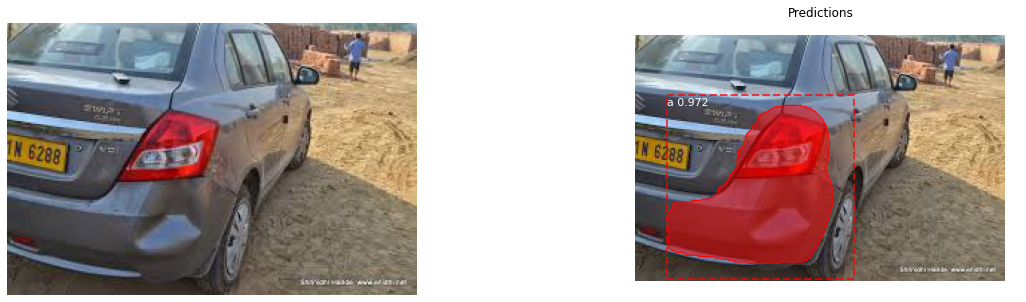

In [14]:
%matplotlib inline

val_dir = CUSTOM_DIR + 'test/'
filelist = glob.glob(os.path.join(val_dir, '*.JPEG'))

# Create model in inference mode   
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
    
model.load_weights(custom_WEIGHTS_PATH, by_name=True) 

# Get a random image
image_id = random.choice(filelist)
image = skimage.io.imread(image_id)  

# Get the prediction results for the random image
results = model.detect([image], verbose=1)
r = results[0]

# Show the original and MASKed image next to each other
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# original image
ax[0].set_axis_off()
ax[0].imshow(image)

# MASKed image
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                    'damage', r['scores'], ax=ax[1],
                    title="Predictions")    